In [ ]:
!pip install -U -q PyDrive
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials

In [ ]:
auth.authenticate_user()
gauth = GoogleAuth().report_unsw(
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

In [ ]:
downloaded = drive.CreateFile({'id':'1dy505B6d5XlWye9TFkvQ1NEdyV4MlY0j'}) 
downloaded.GetContentFile('KDDTrain+.txt')

In [ ]:
downloaded = drive.CreateFile({'id':'1WD2DMZ3Ih0NbckL8Su5LrKkCilg7v-Vh'})
downloaded.GetContentFile('KDDTest+.txt')

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


In [ ]:
data_train_full = "KDDTrain+.txt"
data_test_full = "KDDTest+.txt"

In [ ]:
df_train_full = pd.read_csv(data_train_full)
df_test_full = pd.read_csv(data_test_full)

In [ ]:
NSL_KDD_columns = ['duration', 'protocol_type', 'service', 'flag', 'src_bytes',
       'dst_bytes', 'land', 'wrong_fragment', 'urgent', 'hot',
       'num_failed_logins', 'logged_in', 'num_compromised', 'root_shell',
       'su_attempted', 'num_root', 'num_file_creations', 'num_shells',
       'num_access_files', 'num_outbound_cmds', 'is_host_login',
       'is_guest_login', 'count', 'srv_count', 'serror_rate',
       'srv_serror_rate', 'rerror_rate', 'srv_rerror_rate', 'same_srv_rate',
       'diff_srv_rate', 'srv_diff_host_rate', 'dst_host_count',
       'dst_host_srv_count', 'dst_host_same_srv_rate',
       'dst_host_diff_srv_rate', 'dst_host_same_src_port_rate',
       'dst_host_srv_diff_host_rate', 'dst_host_serror_rate',
       'dst_host_srv_serror_rate', 'dst_host_rerror_rate',
       'dst_host_srv_rerror_rate', 'class', 'classnum']

In [ ]:
df_train_full.columns = NSL_KDD_columns
df_test_full.columns = NSL_KDD_columns

In [ ]:
df_train_full.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 125972 entries, 0 to 125971
Data columns (total 43 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   duration                     125972 non-null  int64  
 1   protocol_type                125972 non-null  object 
 2   service                      125972 non-null  object 
 3   flag                         125972 non-null  object 
 4   src_bytes                    125972 non-null  int64  
 5   dst_bytes                    125972 non-null  int64  
 6   land                         125972 non-null  int64  
 7   wrong_fragment               125972 non-null  int64  
 8   urgent                       125972 non-null  int64  
 9   hot                          125972 non-null  int64  
 10  num_failed_logins            125972 non-null  int64  
 11  logged_in                    125972 non-null  int64  
 12  num_compromised              125972 non-null  int64  
 13 

In [ ]:
df_test_full.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22543 entries, 0 to 22542
Data columns (total 43 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   duration                     22543 non-null  int64  
 1   protocol_type                22543 non-null  object 
 2   service                      22543 non-null  object 
 3   flag                         22543 non-null  object 
 4   src_bytes                    22543 non-null  int64  
 5   dst_bytes                    22543 non-null  int64  
 6   land                         22543 non-null  int64  
 7   wrong_fragment               22543 non-null  int64  
 8   urgent                       22543 non-null  int64  
 9   hot                          22543 non-null  int64  
 10  num_failed_logins            22543 non-null  int64  
 11  logged_in                    22543 non-null  int64  
 12  num_compromised              22543 non-null  int64  
 13  root_shell      

In [ ]:
df_train_full.nunique()

duration                       2981
protocol_type                     3
service                          70
flag                             11
src_bytes                      3341
dst_bytes                      9326
land                              2
wrong_fragment                    3
urgent                            4
hot                              28
num_failed_logins                 6
logged_in                         2
num_compromised                  88
root_shell                        2
su_attempted                      3
num_root                         82
num_file_creations               35
num_shells                        3
num_access_files                 10
num_outbound_cmds                 1
is_host_login                     2
is_guest_login                    2
count                           512
srv_count                       509
serror_rate                      89
srv_serror_rate                  86
rerror_rate                      82
srv_rerror_rate             

In [ ]:
df_train_full.isnull().sum()

duration                       0
protocol_type                  0
service                        0
flag                           0
src_bytes                      0
dst_bytes                      0
land                           0
wrong_fragment                 0
urgent                         0
hot                            0
num_failed_logins              0
logged_in                      0
num_compromised                0
root_shell                     0
su_attempted                   0
num_root                       0
num_file_creations             0
num_shells                     0
num_access_files               0
num_outbound_cmds              0
is_host_login                  0
is_guest_login                 0
count                          0
srv_count                      0
serror_rate                    0
srv_serror_rate                0
rerror_rate                    0
srv_rerror_rate                0
same_srv_rate                  0
diff_srv_rate                  0
srv_diff_h

In [ ]:
df_test_full.isnull().sum()

duration                       0
protocol_type                  0
service                        0
flag                           0
src_bytes                      0
dst_bytes                      0
land                           0
wrong_fragment                 0
urgent                         0
hot                            0
num_failed_logins              0
logged_in                      0
num_compromised                0
root_shell                     0
su_attempted                   0
num_root                       0
num_file_creations             0
num_shells                     0
num_access_files               0
num_outbound_cmds              0
is_host_login                  0
is_guest_login                 0
count                          0
srv_count                      0
serror_rate                    0
srv_serror_rate                0
rerror_rate                    0
srv_rerror_rate                0
same_srv_rate                  0
diff_srv_rate                  0
srv_diff_h

In [ ]:
NSL_KDD_columns_categorical = ['protocol_type', 'service', 'flag', 'class']
NSL_KDD_columns_int = ['duration',  'src_bytes',
       'dst_bytes', 'land', 'wrong_fragment', 'urgent', 'hot',
       'num_failed_logins', 'logged_in', 'num_compromised', 'root_shell',
       'su_attempted', 'num_root', 'num_file_creations', 'num_shells',
       'num_access_files', 'num_outbound_cmds', 'is_host_login',
       'is_guest_login', 'count', 'srv_count',  'dst_host_count',
       'dst_host_srv_count',   'classnum']
NSL_KDD_columns_float = ['serror_rate', 'srv_serror_rate', 'rerror_rate', 'srv_rerror_rate', 
        'same_srv_rate', 'diff_srv_rate', 'srv_diff_host_rate', 'dst_host_same_srv_rate',
        'dst_host_diff_srv_rate', 'dst_host_same_src_port_rate',
        'dst_host_srv_diff_host_rate', 'dst_host_serror_rate',
        'dst_host_srv_serror_rate', 'dst_host_rerror_rate',
        'dst_host_srv_rerror_rate']

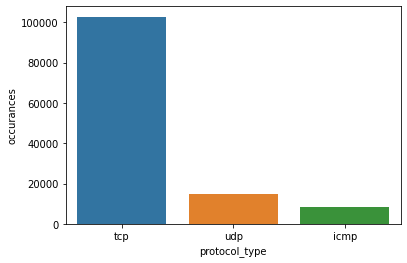

In [ ]:
# categorical feature 'protocol_type'
temp = df_train_full['protocol_type'].value_counts()
a = temp.index
b = temp.values
zipped = list(zip(a, b))
d = pd.DataFrame(zipped, columns=['protocol_type', 'occurances'])
sns.barplot(data=d, x='protocol_type', y='occurances')

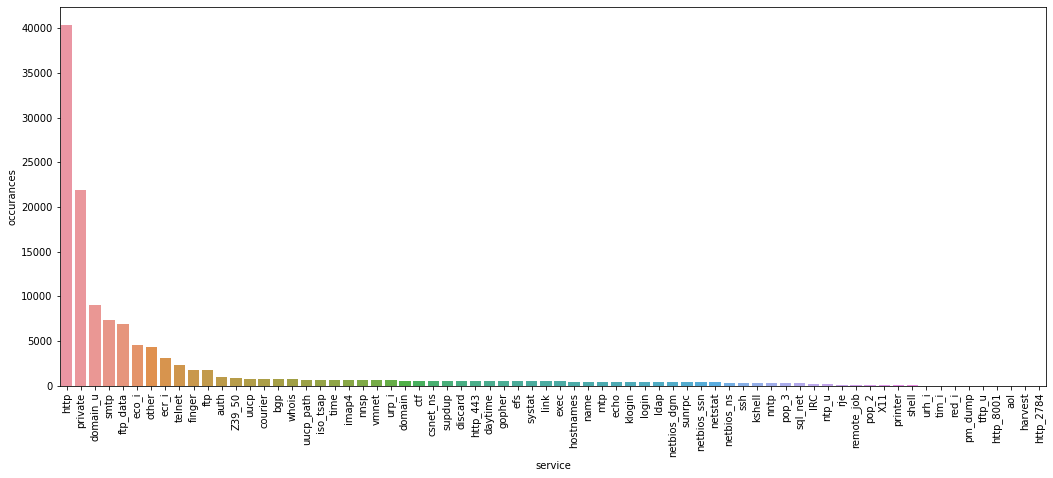

In [ ]:
# categorical feature 'service'
temp = df_train_full['service'].value_counts()
a = temp.index
b = temp.values
zipped = list(zip(a, b))
d = pd.DataFrame(zipped, columns=['service', 'occurances'])
fig, ax = plt.subplots(figsize=(15, 6))
sns.barplot(data=d, x='service', y='occurances')
fig.tight_layout()
plt.xticks(rotation=90)
plt.show()

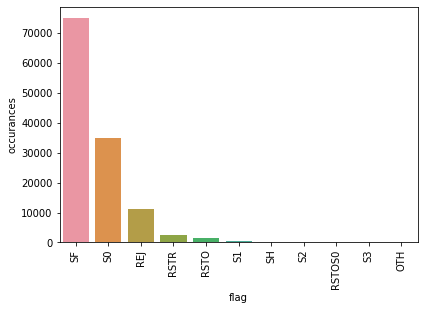

In [ ]:
# categorical feature 'flag'
temp = df_train_full['flag'].value_counts()
a = temp.index
b = temp.values
zipped = list(zip(a, b))
d = pd.DataFrame(zipped, columns=['flag', 'occurances'])
fig, ax = plt.subplots()
sns.barplot(data=d, x='flag', y='occurances')
fig.tight_layout()
plt.xticks(rotation=90)
plt.show()

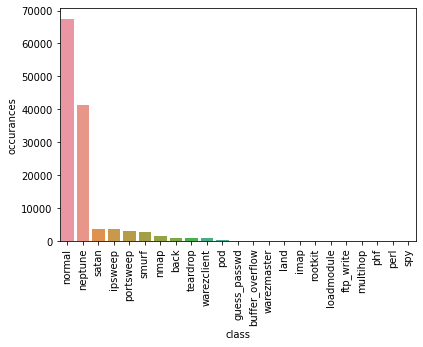

In [ ]:
# categorical feature 'class'
temp = df_train_full['class'].value_counts()
a = temp.index
b = temp.values
zipped = list(zip(a, b))
d = pd.DataFrame(zipped, columns=['class', 'occurances'])
fig, ax = plt.subplots()
sns.barplot(data=d, x='class', y='occurances')
fig.tight_layout()
plt.xticks(rotation=90)
plt.show()

In [ ]:
print(df_train_full[NSL_KDD_columns_int].nunique())

duration              2981
src_bytes             3341
dst_bytes             9326
land                     2
wrong_fragment           3
urgent                   4
hot                     28
num_failed_logins        6
logged_in                2
num_compromised         88
root_shell               2
su_attempted             3
num_root                82
num_file_creations      35
num_shells               3
num_access_files        10
num_outbound_cmds        1
is_host_login            2
is_guest_login           2
count                  512
srv_count              509
dst_host_count         256
dst_host_srv_count     256
classnum                22
dtype: int64


In [ ]:
# int type features - candidate for OneHotEncoding
list1 = ['land', 'wrong_fragment', 'urgent', 'num_failed_logins', 
         'logged_in', 'root_shell', 'su_attempted', 'num_shells', 
         'num_outbound_cmds', 'is_host_login', 'is_guest_login']
# int type features having highly diverse values
list2 = ['duration', 'src_bytes','dst_bytes', 'hot', 
         'num_compromised', 'num_root', 'num_file_creations', 
         'num_access_files', 'count', 'srv_count', 'dst_host_count', 
         'dst_host_srv_count', 'classnum']

In [ ]:
# Those int type features which are candidate for OneHotEncoding

for i in list1:
    print('feature name:',i,'\n', df_train_full[i].value_counts(ascending=False), '\n\n\n')

feature name: land 
 0    125947
1        25
Name: land, dtype: int64 



feature name: wrong_fragment 
 0    124882
3       884
1       206
Name: wrong_fragment, dtype: int64 



feature name: urgent 
 0    125963
1         5
2         3
3         1
Name: urgent, dtype: int64 



feature name: num_failed_logins 
 0    125850
1       104
2         9
3         5
4         3
5         1
Name: num_failed_logins, dtype: int64 



feature name: logged_in 
 0    76120
1    49852
Name: logged_in, dtype: int64 



feature name: root_shell 
 0    125803
1       169
Name: root_shell, dtype: int64 



feature name: su_attempted 
 0    125892
2        59
1        21
Name: su_attempted, dtype: int64 



feature name: num_shells 
 0    125925
1        42
2         5
Name: num_shells, dtype: int64 



feature name: num_outbound_cmds 
 0    125972
Name: num_outbound_cmds, dtype: int64 



feature name: is_host_login 
 0    125971
1         1
Name: is_host_login, dtype: int64 



feature name: is_guest

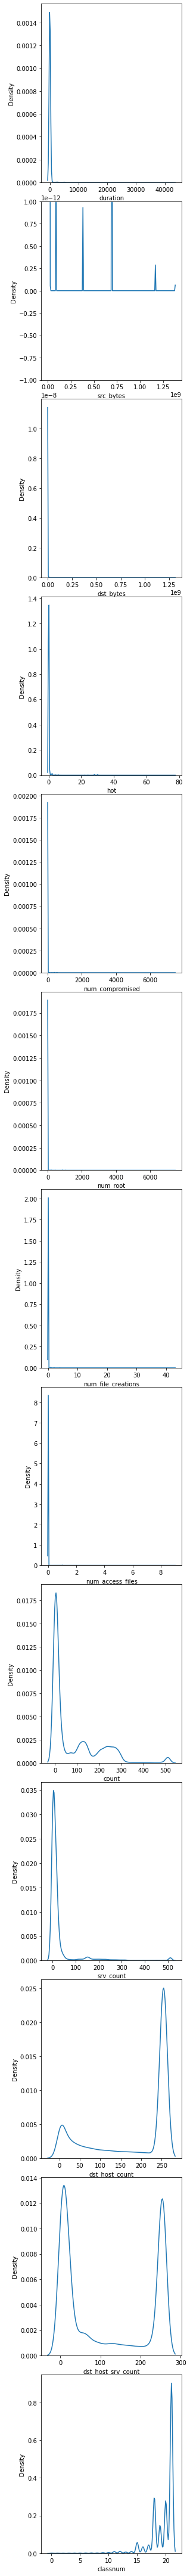

In [ ]:
# highly skewed values - candidate for LogTransformation
# except 'dst_host_srv_count' all features are skewed. This feature is bi-modal.
temp = df_train_full[list2]
fig, ax = plt.subplots(13, 1, figsize=(4, 60))
fig.tight_layout()
for i, j in enumerate (list2):
    sns.kdeplot(ax=ax[i], data=temp, x=j)
plt.show()

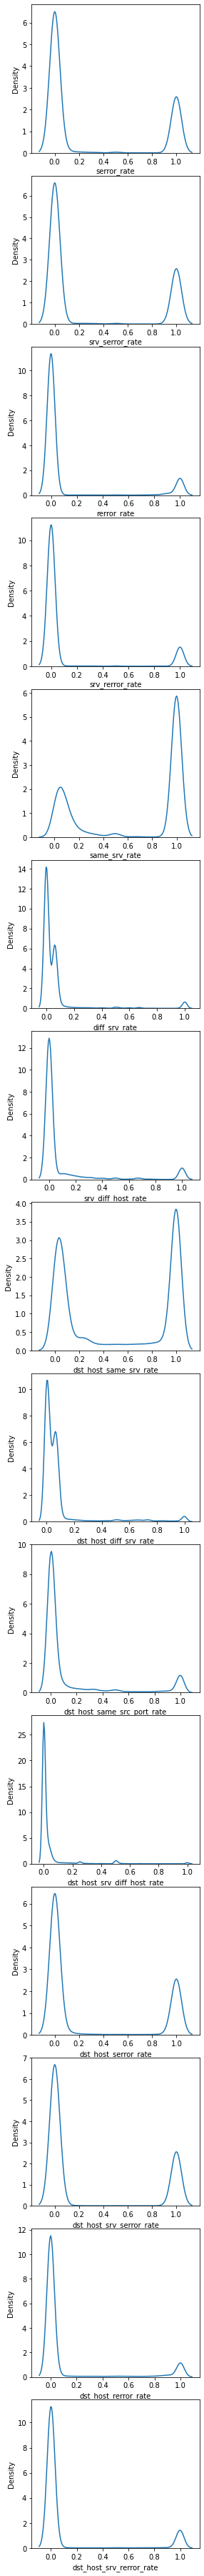

In [ ]:
# multi-modal values (dominantly bi-mondal)
fig, ax = plt.subplots(15, 1, figsize=(4, 50))
fig.tight_layout()

for i, j in enumerate (NSL_KDD_columns_float):
    sns.kdeplot(ax=ax[i], data=df_train_full, x=j)
plt.show()

In [ ]:
DoS_attacks = ['apache2','back','land','neptune','mailbomb','pod','processtable','smurf','teardrop','udpstorm','worm']
Probe_attacks = ['ipsweep','mscan','nmap','portsweep','saint','satan']
U2R = ['buffer_overflow','loadmodule','perl','ps','rootkit','sqlattack','xterm']
R2L = ['ftp_write','guess_passwd','http_tunnel','imap','multihop','named','phf','sendmail','snmpgetattack','snmpguess','spy','warezclient','warezmaster','xclock','xsnoop']

In [ ]:
df_train_full['class'].replace(['apache2','back','land','neptune','mailbomb','pod',
                                'processtable','smurf','teardrop','udpstorm','worm'], 
                                'DoS_attack', inplace=True)
df_train_full['class'].replace(['ipsweep','mscan','nmap','portsweep','saint','satan'], 
                                'Probe_attacks', inplace=True)
df_train_full['class'].replace(['buffer_overflow','loadmodule','perl','ps','rootkit',
                                'sqlattack','xterm'], 'U2R', inplace=True)
df_train_full['class'].replace(['ftp_write','guess_passwd','http_tunnel','imap',
                                'multihop','named','phf','sendmail','snmpgetattack',
                                'snmpguess','spy','warezclient','warezmaster','xclock',
                                'xsnoop'], 'R2L', inplace=True)
df_train_full['class'].replace('normal', 'Normal', inplace=True)

In [ ]:
df_train_full['class'].value_counts()

Normal           67342
DoS_attack       45927
Probe_attacks    11656
R2L                995
U2R                 52
Name: class, dtype: int64

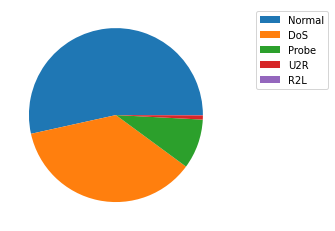

In [ ]:
# 'class' feature
temp = df_train_full['class'].value_counts()
a = temp.index
b = temp.values
zipped = list(zip(a, b))
d = pd.DataFrame(zipped, columns=['class', 'occurances'])
fig.tight_layout()
fig, ax = plt.subplots()
plt.pie(data=d, x=b)
labels = ['Normal','DoS','Probe','U2R','R2L']
plt.legend(labels, bbox_to_anchor=(1, 0, 0.5, 1))
plt.show()

In [ ]:
# Comparative View: 'class' feature VS 'int type' features
# only those int type features are taken which are candidate of OneHotEncoding

for i in list1:
    print(pd.crosstab(df_train_full[i], df_train_full['class']))
    print('\n-------------------------------------------------------------------\n')

class  DoS_attack  Normal  Probe_attacks  R2L  U2R
land                                              
0           45909   67335          11656  995   52
1              18       7              0    0    0

-------------------------------------------------------------------

class           DoS_attack  Normal  Probe_attacks  R2L  U2R
wrong_fragment                                             
0                    44837   67342          11656  995   52
1                      206       0              0    0    0
3                      884       0              0    0    0

-------------------------------------------------------------------

class   DoS_attack  Normal  Probe_attacks  R2L  U2R
urgent                                             
0            45927   67336          11656  993   51
1                0       3              0    1    1
2                0       2              0    1    0
3                0       1              0    0    0

-------------------------------------------

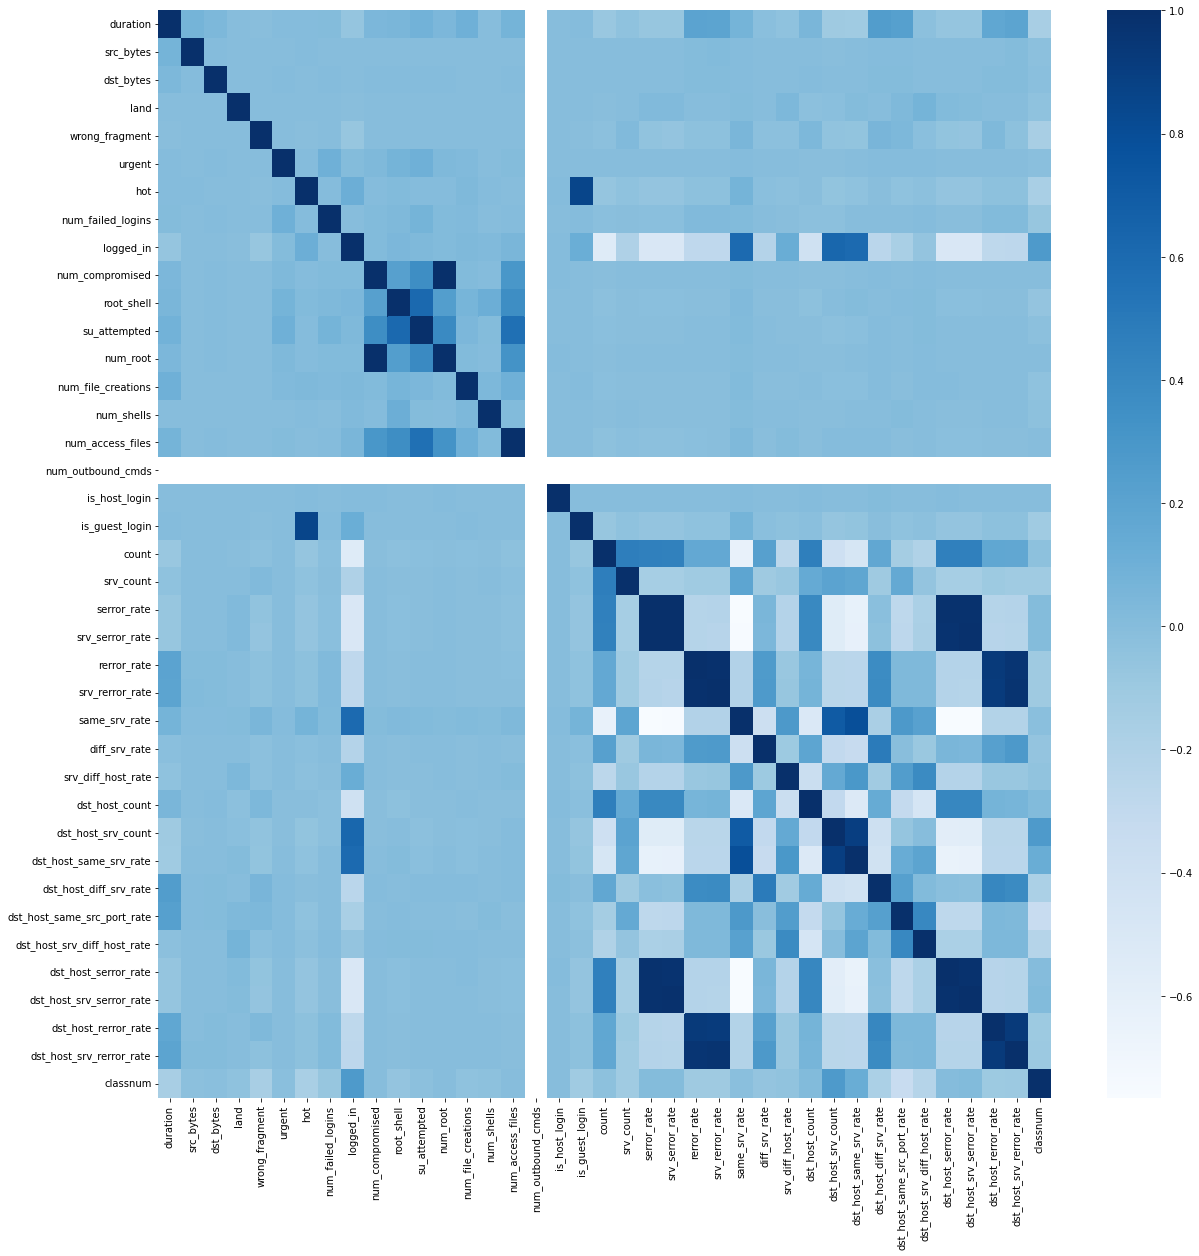

In [ ]:
#obtain the correlations of each features in dataset
corr_matrix = df_train_full.corr()
top_corr_features = corr_matrix.index
plt.figure(figsize=(20,20))
#plot heat map
h_map=sns.heatmap(df_train_full[top_corr_features].corr(), cmap="Blues")